In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

In [5]:
DATASET_PATH = 'C:/Users/zurna/OneDrive/Рабочий стол/учеба/Библиотеки Python/project/train.csv'
DATASET_PATH_TEST = 'C:/Users/zurna/OneDrive/Рабочий стол/учеба/Библиотеки Python/project/test.csv'

### Описание датасета

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [6]:
df = pd.read_csv(DATASET_PATH, index_col='Id')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,NaN,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [7]:
df.shape

(10000, 19)

Тестовый датасет

In [8]:
df_test = pd.read_csv(DATASET_PATH_TEST, index_col='Id')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,NaN,0,0,B
15856,74,2.00,69.26,NaN,1.00,6,1.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,NaN,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,NaN,0,0,A


In [9]:
df_test.shape

(5000, 18)

**Получение информации о данных**

In [10]:
df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [12]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [13]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [14]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [15]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [16]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

**Пропуски**

In [17]:
round(df.isna().mean() * 100, 2)

DistrictId       0.00
Rooms            0.00
Square           0.00
LifeSquare      21.13
KitchenSquare    0.00
Floor            0.00
HouseFloor       0.00
HouseYear        0.00
Ecology_1        0.00
Ecology_2        0.00
Ecology_3        0.00
Social_1         0.00
Social_2         0.00
Social_3         0.00
Healthcare_1    47.98
Helthcare_2      0.00
Shops_1          0.00
Shops_2          0.00
Price            0.00
dtype: float64

In [18]:
len(df) - df.count()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [19]:
df.duplicated().sum()

0

Пропуски содержат столбцы LifeSquare (около 20%) и Healthcare_1 (почти 50%, возможно, не стоит учитывать этот признак в модели)

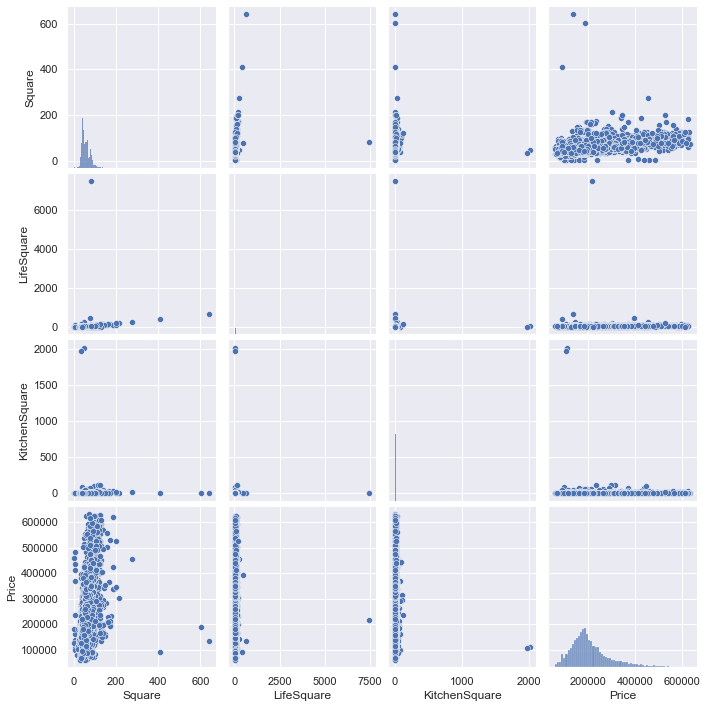

In [20]:
feature_square_names = ['Square', 'LifeSquare', 'KitchenSquare']
sns.set()
sns.pairplot(df[feature_square_names + ['Price']]);

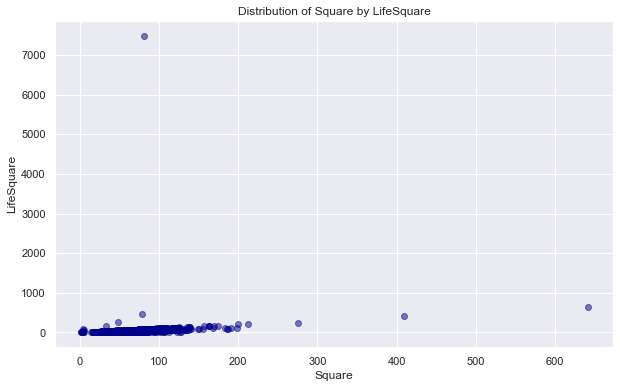

In [21]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Square'], df['LifeSquare'], alpha=0.5, color='darkblue')
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of Square by LifeSquare');

Перед обработкой пропусков, избавимся от явных выбросов

In [22]:
df.loc[(df['Square'] > 250), 'Square'] = df['Square'].median()
df_test.loc[(df_test['Square'] > 250), 'Square'] = df['Square'].median()

df.loc[(df['LifeSquare'] > 250), 'LifeSquare'] = df['LifeSquare'].median()
df_test.loc[(df_test['LifeSquare'] > 250), 'LifeSquare'] = df['LifeSquare'].median()

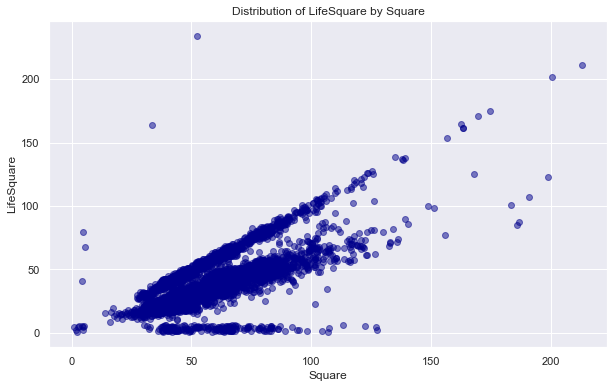

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Square'], df['LifeSquare'], alpha=0.5, color='darkblue')
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of LifeSquare by Square');

Не может быть и слишком маленьких площадей квартир

In [24]:
#на тестовом датасете сделаю ниже так же с помощью merge
df.loc[(df['Square'] < 25), 'Square'] = \
    df.groupby(['Rooms'])['Square'].transform(lambda x: x.median())

In [25]:
df.loc[(df['LifeSquare'] < 15), 'LifeSquare'] = \
    df.groupby(['Rooms'])['LifeSquare'].transform(lambda x: x.median())

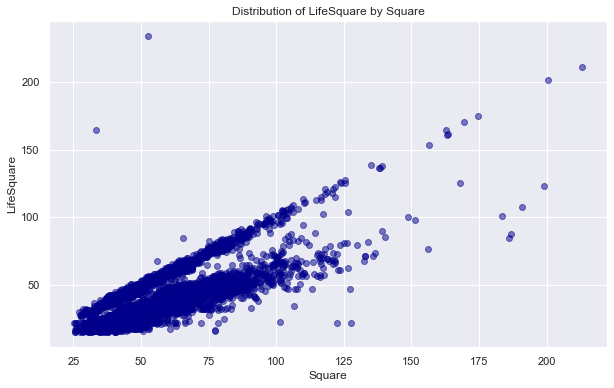

In [26]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Square'], df['LifeSquare'], alpha=0.5, color='darkblue')
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of LifeSquare by Square');

**Rooms**

In [27]:
df['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
6.00        1
19.00       1
Name: Rooms, dtype: int64

In [28]:
df_test['Rooms'].value_counts()

2.00     2030
1.00     1769
3.00     1099
4.00       90
5.00        7
0.00        2
6.00        2
17.00       1
Name: Rooms, dtype: int64

In [29]:
df.loc[(df['Rooms'] > 5) | (df['Rooms'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
5927,57,10.00,59.06,36.22,10.00,22,22.00,2002,0.09,B,B,74,19083,2,NaN,5,15,B,"317,265.32"
12638,27,0.00,138.43,136.22,0.00,4,3.00,2016,0.08,B,B,11,3097,0,NaN,0,0,B,"268,394.74"
8491,1,19.00,42.01,21.78,7.00,17,17.00,2014,0.01,B,B,1,264,0,NaN,0,1,B,"78,364.62"
7917,27,0.00,212.93,211.23,0.00,2,3.00,2008,0.21,B,B,9,1892,0,NaN,0,1,B,"302,211.26"
14003,99,6.00,59.41,38.70,6.00,7,9.00,1969,0.03,B,B,66,10573,1,"1,322.00",3,8,B,"229,661.96"
7317,27,0.00,41.79,NaN,0.00,13,0.00,1977,0.21,B,B,9,1892,0,NaN,0,1,B,"98,129.98"
770,28,0.00,49.48,NaN,0.00,16,0.00,2015,0.12,B,B,30,6207,1,"1,183.00",1,0,B,"217,009.34"
456,6,0.00,81.49,NaN,0.00,4,0.00,1977,0.24,B,B,5,1564,0,540.00,0,0,B,"212,864.80"
3224,27,0.00,65.49,85.13,0.00,1,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B,"126,596.94"


In [30]:
df_test.loc[(df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
10793,23,6.00,110.75,NaN,0.00,2,2.00,2015,0.01,B,B,2,475,0,NaN,0,0,B
3343,58,0.00,116.82,113.69,0.00,3,3.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B
10729,27,0.00,76.35,42.82,12.00,14,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B
4058,27,6.00,223.45,104.11,16.00,2,2.00,2017,0.04,B,B,53,14892,4,NaN,1,4,B
1435,111,17.00,52.87,32.53,8.00,15,17.00,1987,0.09,B,B,23,4635,5,"3,300.00",2,4,B


In [31]:
df.groupby('Rooms')['Square'].mean()

Rooms
0.00     89.51
1.00     41.41
2.00     56.52
3.00     77.02
4.00     98.38
5.00    110.22
6.00     59.41
10.00    59.96
19.00    42.01
Name: Square, dtype: float64

Обработаем выбросы (больше 5 комнат) ориентируясь на площадь

In [32]:
df.loc[((df['Rooms'] > 5) | (df['Rooms'] == 0)) & (df['Square'] < 42), 'Rooms' ] = 1
df_test.loc[((df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)) & (df_test['Square'] < 42), 'Rooms' ] = 1

In [33]:
df.loc[((df['Rooms'] > 5) | (df['Rooms'] == 0)) & (df['Square'] < 60), 'Rooms' ] = 2
df_test.loc[((df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)) & (df_test['Square'] < 60), 'Rooms' ] = 2

In [34]:
df.loc[((df['Rooms'] > 5) | (df['Rooms'] == 0)) & (df['Square'] < 80), 'Rooms' ] = 3
df_test.loc[((df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)) & (df_test['Square'] < 80), 'Rooms' ] = 3

In [35]:
df.loc[((df['Rooms'] > 5) | (df['Rooms'] == 0)) & (df['Square'] < 100), 'Rooms' ] = 4
df_test.loc[((df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)) & (df_test['Square'] < 100), 'Rooms' ] = 4

In [36]:
df.loc[((df['Rooms'] > 5) | (df['Rooms'] == 0)) & (df['Square'] > 100), 'Rooms' ] = 5
df_test.loc[((df_test['Rooms'] > 5) | (df_test['Rooms'] == 0)) & (df_test['Square'] > 100), 'Rooms' ] = 5

In [37]:
df['Rooms'].value_counts()

2.00    3884
1.00    3707
3.00    2237
4.00     152
5.00      20
Name: Rooms, dtype: int64

In [38]:
df_test['Rooms'].value_counts()

2.00    2031
1.00    1769
3.00    1100
4.00      90
5.00      10
Name: Rooms, dtype: int64

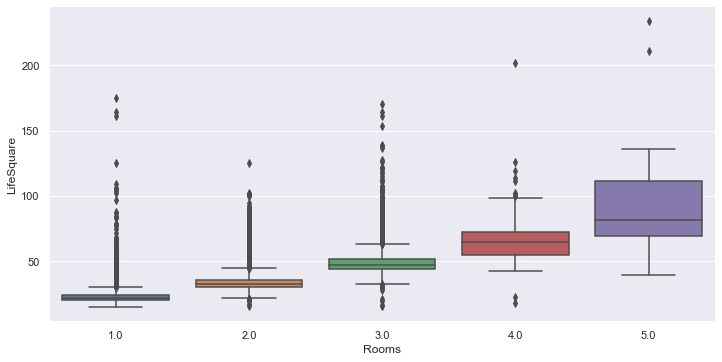

In [39]:
sns.catplot('Rooms', 'LifeSquare', kind="box", data=df, aspect=2/1);

Из графиков выше видна зависимость LifeSquare от Square и Rooms. Заменим пропуски на медиану по Rooms

In [40]:
df.loc[df['LifeSquare'].isna(), 'LifeSquare'] =\
    df.groupby(['Rooms'])['LifeSquare'].transform(lambda x: x.median())

In [41]:
df['LifeSquare'].describe()

count   10,000.00
mean        35.55
std         15.98
min         15.00
25%         22.22
50%         32.55
75%         44.57
max        233.95
Name: LifeSquare, dtype: float64

Так как не получилось заменить пропуски в тестовом датасете через transform, делаю через merge:

In [42]:
S_rooms = df.groupby('Rooms')["Square"].median().rename("S_median").reset_index()
LS_rooms = df.groupby('Rooms')["LifeSquare"].median().rename("LS_median").reset_index()
LS_rooms

,Rooms,LS_median
0,1.00,21.66
1,2.00,32.55
2,3.00,46.96
3,4.00,64.98
4,5.00,81.53


In [43]:
S_rooms

,Rooms,S_median
0,1.00,40.41
1,2.00,55.83
2,3.00,77.41
3,4.00,98.52
4,5.00,116.08


In [44]:
df = df.merge(S_rooms, on=['Rooms'], how='left').set_index(df.index)
df_test = df_test.merge(S_rooms, on=['Rooms'], how='left').set_index(df_test.index)

In [45]:
df = df.merge(LS_rooms, on=['Rooms'], how='left').set_index(df.index)
df_test = df_test.merge(LS_rooms, on=['Rooms'], how='left').set_index(df_test.index)
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,NaN,0,0,B,55.83,32.55
15856,74,2.00,69.26,NaN,1.00,6,1.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B,55.83,32.55
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B,40.41,21.66
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,NaN,3,3,B,55.83,32.55
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,NaN,0,0,A,40.41,21.66


In [46]:
df_test.loc[(df_test['Square'] < 25), 'Square'] = df_test['S_median']  
df_test.loc[(df_test['LifeSquare'] < 15), 'LifeSquare'] = df_test['LS_median']  

df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = df_test['LS_median']

In [47]:
df_test['LifeSquare'].describe()

count   5,000.00
mean       35.73
std        15.48
min        15.02
25%        22.67
50%        32.55
75%        44.67
max       169.90
Name: LifeSquare, dtype: float64

In [48]:
df_test['Square'].describe()

count   5,000.00
mean       56.58
std        18.89
min        25.24
25%        41.91
50%        52.92
75%        66.29
max       223.45
Name: Square, dtype: float64

Заменим пропуски Healthcare_1 на медиану

In [49]:
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].median()
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [50]:
df['Healthcare_1'].describe()

count   10,000.00
mean     1,026.36
std        746.66
min          0.00
25%        830.00
50%        900.00
75%        990.00
max      4,849.00
Name: Healthcare_1, dtype: float64

In [51]:
df_test['Healthcare_1'].describe()

count   5,000.00
mean    1,029.40
std       766.60
min         0.00
25%       810.00
50%       900.00
75%       990.00
max     4,849.00
Name: Healthcare_1, dtype: float64

**Обработка выбросов (продолжение)**

**Square, LifeSquare, KitchenSquare**

In [52]:
df.loc[(df['KitchenSquare'] > 250), 'KitchenSquare'] = df['KitchenSquare'].median()
df_test.loc[(df_test['KitchenSquare'] > 250), 'KitchenSquare'] = df['KitchenSquare'].median()

In [53]:
df[df['Square'] < df['LifeSquare'] + df['KitchenSquare']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,,
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,...,23,5735,3,"1,084.00",0,5,B,"175,616.23",55.83,32.55
8054,23,1.00,42.53,43.97,1.00,3,9.00,2014,0.03,B,...,0,168,0,900.00,0,0,B,"95,338.20",40.41,21.66
10521,38,3.00,104.21,106.34,0.00,20,0.00,2017,0.06,B,...,15,2787,2,520.00,0,7,B,"435,462.05",77.41,46.96
7596,23,1.00,47.08,46.81,12.00,3,9.00,1977,0.01,B,...,2,475,0,900.00,0,0,B,"96,029.17",40.41,21.66
2301,1,2.00,61.40,65.22,0.00,17,22.00,2016,0.01,B,...,1,264,0,900.00,0,1,B,"199,215.45",55.83,32.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,1,1.00,38.33,38.01,8.00,7,17.00,1991,0.03,B,...,33,5261,0,240.00,3,1,B,"97,464.33",40.41,21.66
14001,73,1.00,44.10,44.27,1.00,7,24.00,2014,0.04,B,...,37,6856,84,"1,940.00",2,5,B,"381,937.40",40.41,21.66
16568,27,4.00,200.33,201.63,25.00,1,2.00,2013,0.04,B,...,53,14892,4,900.00,1,4,B,"528,560.51",98.52,64.98


In [54]:
df[df['Square'] < df['KitchenSquare']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,,
13703,42,1.00,38.07,19.72,73.00,9,10.00,2006,0.16,B,...,21,5731,0,900.00,1,0,B,"160,488.03",40.41,21.66
6569,27,1.00,38.22,18.72,84.00,4,17.00,2018,0.01,B,...,4,915,0,900.00,0,0,B,"99,079.96",40.41,21.66


In [55]:
df_test[df_test['Square'] < df_test['KitchenSquare']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,
10662,29,1.00,25.96,17.25,33.00,5,5.00,1973,0.07,B,B,31,6119,4,900.00,1,2,B,40.41,21.66
3194,29,2.00,43.93,31.03,44.00,6,5.00,1964,0.09,B,B,10,2277,2,"1,547.00",0,0,B,55.83,32.55
12640,6,2.00,54.63,31.49,97.00,4,17.00,2015,0.24,B,B,5,1564,0,540.00,0,0,B,55.83,32.55


In [56]:
df.loc[df['Square'] < df['KitchenSquare'], 'KitchenSquare'] = df['Square'] - df['LifeSquare']
df_test.loc[df_test['Square'] < df_test['KitchenSquare'], 'KitchenSquare'] = df_test['Square'] - df_test['LifeSquare']

In [57]:
df.loc[(df['Square'] < df['LifeSquare'] + df['KitchenSquare']), 'LifeSquare'] = \
    df['Square'] - df['KitchenSquare']
df_test.loc[(df_test['Square'] < df_test['LifeSquare'] + df_test['KitchenSquare']), 'LifeSquare'] = \
    df_test['Square'] - df_test['KitchenSquare']

Сделаем проверку на отрицательные значения после вычитания.

In [58]:
df[(df['LifeSquare'] < 0) | (df['KitchenSquare'] < 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,,


In [59]:
df_test[(df_test['LifeSquare'] < 0) | (df_test['KitchenSquare'] < 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,


In [60]:
df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","10,000.00","10,000.00"
mean,56.25,34.99,5.86
std,18.88,15.25,5.07
min,25.41,0.13,0.00
25%,41.78,22.14,1.00
50%,52.54,32.55,6.00
75%,65.90,44.04,9.00
max,212.93,211.23,123.00


In [61]:
df_test[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"5,000.00","5,000.00","5,000.00"
mean,56.58,35.22,5.83
std,18.89,14.90,4.64
min,25.24,0.11,0.00
25%,41.91,22.63,1.00
50%,52.92,32.55,6.00
75%,66.29,44.23,9.00
max,223.45,168.73,112.00


**Floor, HouseFloor**

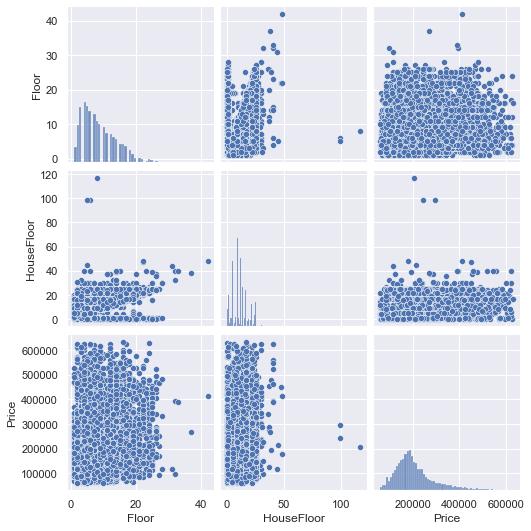

In [62]:
feature_floor_names = ['Floor', 'HouseFloor']
sns.set()
sns.pairplot(df[feature_floor_names + ['Price']]);

Заменим слишком большие и нулевые значения этажности здания и этажей на моду

In [63]:
df.loc[df['HouseFloor'] > 90, 'HouseFloor'] = df['HouseFloor'].mode()[0]
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].mode()[0]
df_test.loc[df_test['HouseFloor'] > 90, 'HouseFloor'] = df['HouseFloor'].mode()[0]
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].mode()[0]

In [64]:
df.loc[df['Floor'] > 30, 'Floor'] = df['Floor'].mode()[0]
df_test.loc[df_test['Floor'] > 30, 'Floor'] = df['Floor'].mode()[0]

Там, где этаж квартиры больше, чем всего этажей в здании, заменим HouseFloor на Floor

In [65]:
df[df['Floor'] > df['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,S_median,LS_median
Id,,,,,,,,,,,,,,,,,,,,,
10953,27,1.00,53.77,52.41,1.00,5,4.00,1977,0.07,B,...,2,629,1,900.00,0,0,A,"140,647.57",40.41,21.66
2119,27,2.00,49.36,31.99,5.00,6,5.00,1983,0.05,B,...,5,1227,0,900.00,0,0,B,"117,000.38",55.83,32.55
11935,27,2.00,64.71,32.55,1.00,15,1.00,1977,0.21,B,...,9,1892,0,900.00,0,1,B,"127,200.03",55.83,32.55
6486,200,3.00,85.28,58.45,9.00,6,5.00,1960,0.00,B,...,33,7425,1,900.00,2,5,B,"402,871.92",77.41,46.96
10521,38,3.00,104.21,104.21,0.00,20,17.00,2017,0.06,B,...,15,2787,2,520.00,0,7,B,"435,462.05",77.41,46.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3.00,64.07,47.63,6.00,11,9.00,1983,0.37,B,...,34,7065,1,750.00,2,5,B,"226,434.88",77.41,46.96
16159,27,1.00,38.97,21.66,1.00,10,1.00,1977,0.21,B,...,9,1892,0,900.00,0,1,B,"95,529.57",40.41,21.66
4145,96,3.00,90.06,47.86,11.00,26,24.00,2005,0.04,B,...,53,14892,4,900.00,1,4,B,"441,108.91",77.41,46.96


In [66]:
df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df['Floor']
df_test.loc[df_test['Floor'] > df_test['HouseFloor'], 'HouseFloor'] = df_test['Floor']

**HouseYear**

In [67]:
df['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [68]:
df_test['HouseYear'].unique()

array([1972, 1977, 1909, 2007, 2017, 1997, 2014, 1981, 1971, 1968, 1974,
       1959, 1976, 2015, 2004, 2000, 1970, 1964, 1975, 1988, 1963, 1987,
       1933, 1962, 1969, 1984, 1980, 1929, 1990, 1960, 2016, 1954, 1996,
       2019, 1993, 1911, 1985, 1982, 1966, 1978, 2003, 1983, 1973, 2018,
       2013, 2010, 1957, 1958, 1965, 2008, 1986, 1979, 2012, 1995, 1999,
       1989, 1992, 2009, 1956, 2005, 1998, 1940, 2002, 1991, 1967, 1994,
       2020, 1955, 1961, 2006, 2011, 1926, 2001, 1934, 1917, 1931, 1953,
       1943, 1941, 1930, 1912, 1935, 1927, 1937, 1918, 1950, 1952, 1910,
       1939, 1914, 1908, 1938, 1928, 1932, 1948, 1949, 1920], dtype=int64)

In [69]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [70]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = df['HouseYear'].mode()[0]

Для наглядности сделаем новый признак возраст домов (HouseAge)

In [71]:
df['HouseAge'] = 2021 - df['HouseYear']

In [72]:
df_test['HouseAge'] = 2021 - df_test['HouseYear']

In [73]:
houseage_count = df['HouseAge'].value_counts().reset_index()\
                .rename(columns={'index':'HouseAge', 'HouseAge':'Count'})

houseage_count

,HouseAge,Count
0,44,2653
1,4,308
2,5,305
3,6,299
4,7,210
...,...,...
90,107,1
91,93,1
92,74,1
93,105,1


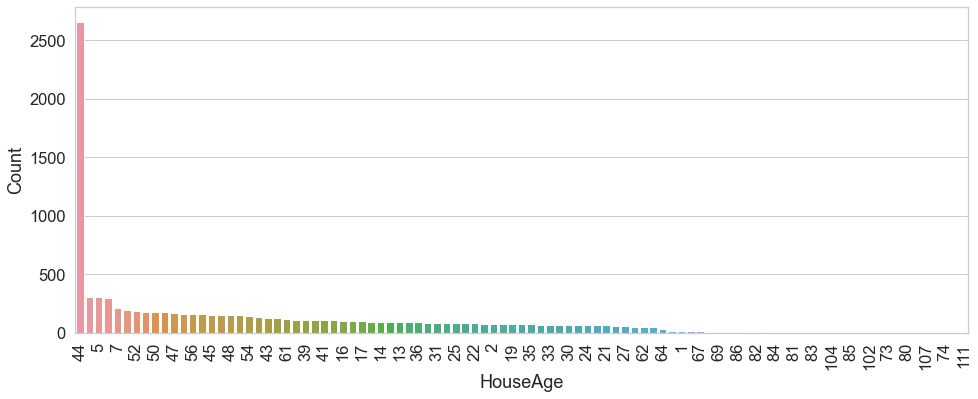

In [74]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='Count', x='HouseAge', 
            data=houseage_count,
            order=houseage_count.sort_values(by='Count', ascending=False)['HouseAge']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [75]:
houseage_count_test = df_test['HouseAge'].value_counts().reset_index()\
                .rename(columns={'index':'HouseAge', 'HouseAge':'Count'})

houseage_count_test

,HouseAge,Count
0,44,1298
1,5,172
2,6,159
3,4,141
4,51,111
...,...,...
92,73,1
93,112,1
94,104,1
95,72,1


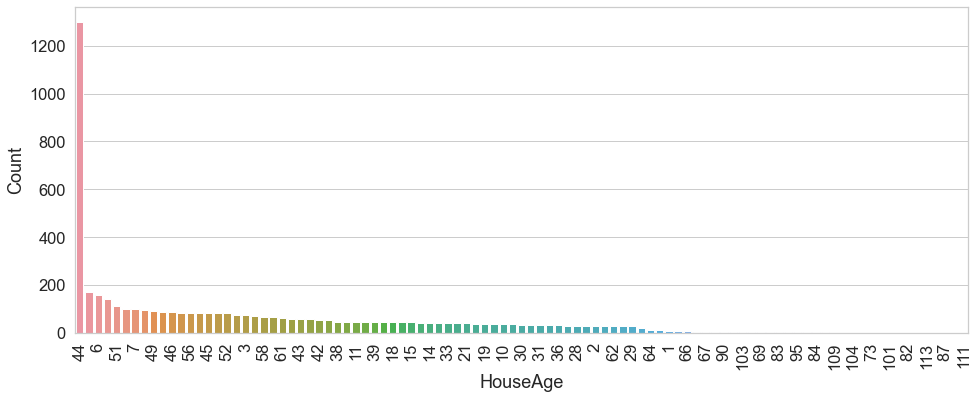

In [76]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='Count', x='HouseAge', 
            data=houseage_count_test,
            order=houseage_count_test.sort_values(by='Count', ascending=False)['HouseAge']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

**Кодирование категориальных признаков**

In [77]:
feature_cat_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

df[feature_cat_names] = df[feature_cat_names].replace({'A':0, 'B':1})
df_test[feature_cat_names] = df_test[feature_cat_names].replace({'A':0, 'B':1})

**Оценка распредения целевой переменной в разрезе некоторых признаков**

Rooms

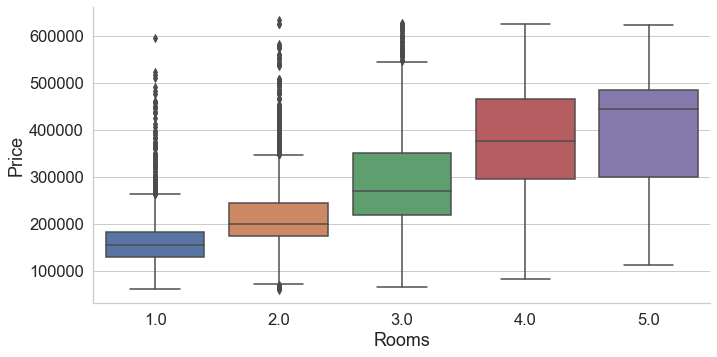

In [78]:
sns.catplot('Rooms', 'Price', kind="box", data=df, aspect=2/1);

Square

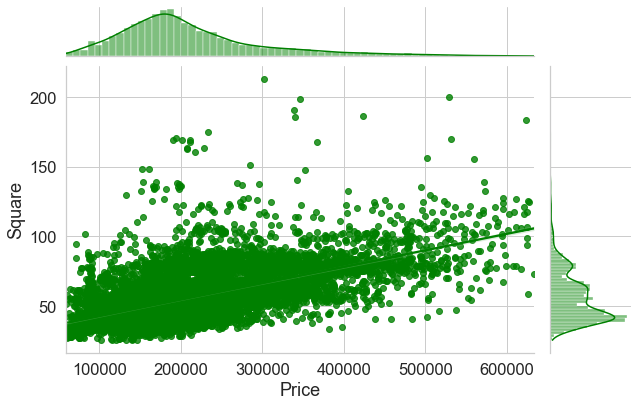

In [79]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df['Price'], df['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

Helthcare_1

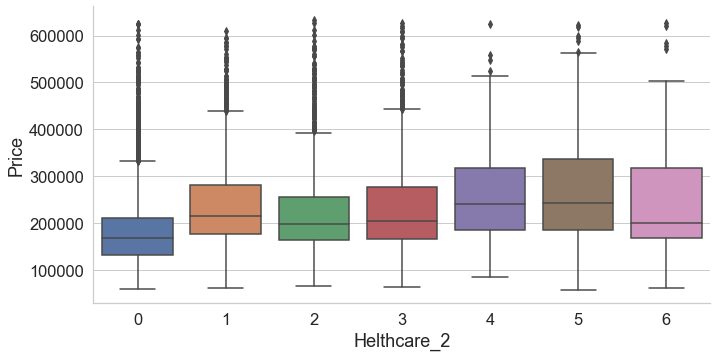

In [80]:
sns.catplot('Helthcare_2', 'Price', kind="box", data=df, aspect=2/1);

DistrictId

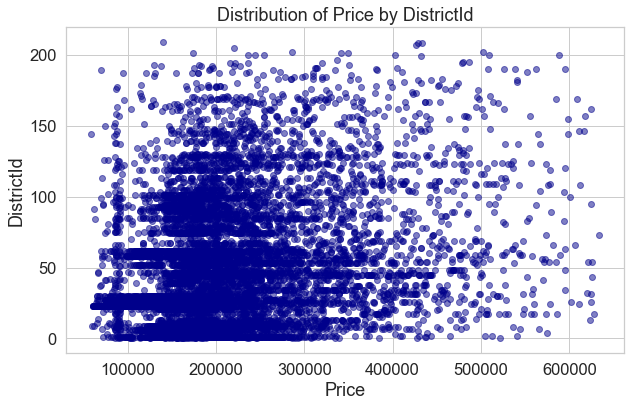

In [81]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Price'], df['DistrictId'], alpha=0.5, color='darkblue')
plt.xlabel('Price')
plt.ylabel('DistrictId')
plt.title('Distribution of Price by DistrictId');

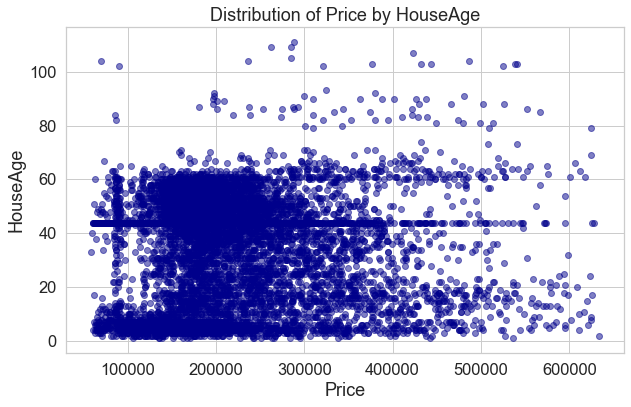

In [82]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Price'], df['HouseAge'], alpha=0.5, color='darkblue')
plt.xlabel('Price')
plt.ylabel('HouseAge')
plt.title('Distribution of Price by HouseAge');

**Обработка редких категорий**

Helthcare_2

In [83]:
df['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

In [84]:
df.replace({'Helthcare_2' : {3: 2, 6: 2, 4: 1, 5: 1}}, inplace=True)
df['Helthcare_2'].value_counts()

0    4214
2    2927
1    2859
Name: Helthcare_2, dtype: int64

In [85]:
df_test['Helthcare_2'].value_counts()

0    2096
1    1096
3     855
2     570
5     186
4     158
6      39
Name: Helthcare_2, dtype: int64

In [86]:
df_test.replace({'Helthcare_2' : {3: 2, 6: 2, 4: 1, 5: 1}}, inplace=True)
df_test['Helthcare_2'].value_counts()

0    2096
2    1464
1    1440
Name: Helthcare_2, dtype: int64

**Построение новых признаков**

Стоимость единицы площади

In [87]:
df['PricePerUnitSquare'] = df['Price'] / df['Square']

Стоимость единицы площади в зависимости от количества комнат

In [88]:
pricesquare_by_rooms = df.groupby(['Rooms'], as_index=False)\
                        .agg({'PricePerUnitSquare':'mean'})\
                        .rename(columns={'PricePerUnitSquare':'PricePerUnitSquareByRooms'})

df = df.merge(pricesquare_by_rooms, on=['Rooms'], how='left').set_index(df.index)
df_test = df_test.merge(pricesquare_by_rooms, on=['Rooms'], how='left').set_index(df_test.index)

Стоимость единицы площади в зависимости от DistrictId

In [89]:
pricesquare_by_distr = df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PricePerUnitSquare':'mean'})\
                        .rename(columns={'PricePerUnitSquare':'PricePerUnitSquareByDistr'})

df = df.merge(pricesquare_by_distr, on=['DistrictId'], how='left').set_index(df.index)
df_test = df_test.merge(pricesquare_by_distr, on=['DistrictId'], how='left').set_index(df_test.index)

In [90]:
df_test['PricePerUnitSquareByDistr'].isna().value_counts()

False    4992
True        8
Name: PricePerUnitSquareByDistr, dtype: int64

In [91]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,S_median,LS_median,HouseAge,PricePerUnitSquareByRooms,PricePerUnitSquareByDistr
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,1,...,1,900.00,0,0,1,55.83,32.55,49,"3,887.38","3,021.68"
15856,74,2.00,69.26,32.55,1.00,6,6.00,1977,0.08,1,...,3,900.00,0,2,1,55.83,32.55,44,"3,887.38","3,355.34"
5480,190,1.00,40.41,15.95,12.00,2,5.00,1909,0.00,1,...,87,"4,702.00",1,5,1,40.41,21.66,112,"3,931.12","7,919.44"
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,1,...,3,900.00,2,3,1,55.83,32.55,14,"3,887.38","4,116.35"
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,1,...,1,900.00,0,0,0,40.41,21.66,4,"3,931.12","2,763.71"


В тесте появились пропущенные значения, так как DistrictId в тесте не все совпадают с трейном. Заменим пропуски на значения в 'PricePerUnitSquareByRooms'.

In [92]:
df_test.loc[df_test['PricePerUnitSquareByDistr'].isna(), 'PricePerUnitSquareByDistr'] = df_test['PricePerUnitSquareByRooms']

Стоимость единицы площади в зависимости от года постройки 

In [93]:
pricesquare_by_age = df.groupby(['HouseAge'], as_index=False)\
                        .agg({'PricePerUnitSquare':'mean'})\
                        .rename(columns={'PricePerUnitSquare':'PricePerUnitSquareByAge'})

df = df.merge(pricesquare_by_age, on=['HouseAge'], how='left').set_index(df.index)
df_test = df_test.merge(pricesquare_by_age, on=['HouseAge'], how='left').set_index(df_test.index)

In [94]:
df_test['PricePerUnitSquareByAge'].isna().value_counts()

False    4988
True       12
Name: PricePerUnitSquareByAge, dtype: int64

В тесте появились пропущенные значения, так как HouseAge в тесте не все совпадают с трейном. Заменим пропуски на значения в 'PricePerUnitSquareByDistr'.

In [95]:
df_test.loc[df_test['PricePerUnitSquareByAge'].isna(), 'PricePerUnitSquareByAge'] = df_test['PricePerUnitSquareByDistr']

Площадь комнаты

In [97]:
df['RoomSquare'] = df['Square'] / df['Rooms']
df_test['RoomSquare'] = df_test['Square'] / df_test['Rooms']

In [98]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_2,Price,S_median,LS_median,HouseAge,PricePerUnitSquare,PricePerUnitSquareByRooms,PricePerUnitSquareByDistr,PricePerUnitSquareByAge,RoomSquare
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,1,...,1,"184,966.93",55.83,32.55,52,"3,854.96","3,887.38","4,384.63","4,457.16",23.99
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,1,...,1,"300,009.45",77.41,46.96,43,"4,567.49","3,809.95","4,263.13","4,348.03",21.89
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,1,...,1,"220,925.91",55.83,32.55,53,"4,915.15","3,887.38","4,835.40","4,450.71",22.47
5809,58,2.00,53.35,44.35,9.00,8,17.00,1977,0.44,1,...,1,"175,616.23",55.83,32.55,44,"3,291.59","3,887.38","3,021.68","3,079.42",26.68
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,1,...,1,"150,226.53",40.41,21.66,45,"3,788.89","3,931.12","3,938.33","4,363.39",39.65


In [99]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,S_median,LS_median,HouseAge,PricePerUnitSquareByRooms,PricePerUnitSquareByDistr,PricePerUnitSquareByAge,RoomSquare
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,1,...,0,0,1,55.83,32.55,49,"3,887.38","3,021.68","4,321.25",24.94
15856,74,2.00,69.26,32.55,1.00,6,6.00,1977,0.08,1,...,0,2,1,55.83,32.55,44,"3,887.38","3,355.34","3,079.42",34.63
5480,190,1.00,40.41,15.95,12.00,2,5.00,1909,0.00,1,...,1,5,1,40.41,21.66,112,"3,931.12","7,919.44","7,919.44",40.41
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,1,...,2,3,1,55.83,32.55,14,"3,887.38","4,116.35","4,361.58",36.52
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,1,...,0,0,0,40.41,21.66,4,"3,931.12","2,763.71","3,431.62",47.53


**Отбор признаков**

In [100]:
df.to_csv('train_prepared.csv')
df_test.to_csv('test_prepared.csv')

In [101]:
feature_names = df.columns
feature_names.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'S_median',
 'LS_median',
 'HouseAge',
 'PricePerUnitSquare',
 'PricePerUnitSquareByRooms',
 'PricePerUnitSquareByDistr',
 'PricePerUnitSquareByAge',
 'RoomSquare']

Удалим все, что с Price, и вспомогательные LS_median и S_median

In [102]:
target_name = ['Price']
feature_names_full = [feature for feature in feature_names if feature not in ['Price', 'PricePerUnitSquare',\
                                                                             'LS_median', 'S_median']]
len(feature_names_full)

23

### Отбор признаков методом RFE

In [103]:
X_full = df[feature_names_full]
y = df[target_name]

In [104]:
forest = RandomForestRegressor(random_state=42)
kf = KFold(n_splits=5, random_state=42, shuffle=True)

forest.fit(X_full, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names_full)
feat_importances.sort_values(ascending=True, inplace=True)

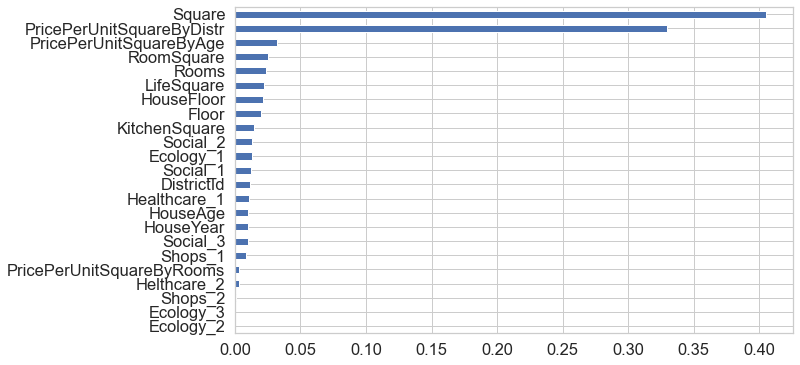

In [105]:
feat_importances.plot(kind='barh', figsize=(10, 6)); 

In [106]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=forest, 
          n_features_to_select=16,
          step=2)

rfe.fit(X_full, y)
X_full.columns[rfe.support_]

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'HouseAge', 'PricePerUnitSquareByDistr',
       'PricePerUnitSquareByAge', 'RoomSquare'],
      dtype='object')

In [107]:
X = rfe.transform(X_full)
scores = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: %.5f' % scores.mean())

R2: 0.75546


In [108]:
for n in range(16, 24, 1):
    rfe = RFE(forest, n_features_to_select=n, step=2)
    X = rfe.fit_transform(X_full, y)
    scores = cross_val_score(forest, X, y, scoring='r2', cv=kf)
    print('n_features_to_select: {} - R2: {:.5}'.format(n, scores.mean())) 

n_features_to_select: 16 - R2: 0.75546
n_features_to_select: 17 - R2: 0.75553
n_features_to_select: 18 - R2: 0.75613
n_features_to_select: 19 - R2: 0.75593
n_features_to_select: 20 - R2: 0.7556
n_features_to_select: 21 - R2: 0.75613
n_features_to_select: 22 - R2: 0.75598
n_features_to_select: 23 - R2: 0.75617


In [129]:
target_name = ['Price']
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'HouseAge', 'PricePerUnitSquareByDistr',
       'PricePerUnitSquareByAge', 'Shops_1', 'RoomSquare']                

In [130]:
len(feature_names)

18

In [131]:
X = df[feature_names]
y = df[target_name]

## Настройка гиперпараметров модели

In [132]:
params = {
    'max_depth': [15, 16, 17],
    'max_features': [4, 5, 6]
}

In [133]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=5, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_)) 

{'max_depth': 17, 'max_features': 5}
R2 на train: 0.76564


## Прогнозирование на тестовом датасете

In [134]:
forest_best = RandomForestRegressor(max_depth=17,
                                    max_features=5,
                                    random_state=42)
forest_best.fit(X, y)
y_pred = forest_best.predict(df_test[feature_names])
y_pred

array([156820.16182402, 233929.08997657, 316276.99675678, ...,
       323423.58788017, 187816.75282885, 171154.12657355])

In [135]:
preds = pd.DataFrame()
preds['Id'] = df_test.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,"156,820.16"
1,15856,"233,929.09"
2,5480,"316,277.00"
3,15664,"328,158.28"
4,14275,"146,271.05"


In [136]:
preds.to_csv('OfitserovaYuliya_prediction_1401.csv', index=False)